# Loading the dataset

In [1]:
%matplotlib inline

import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.preprocessing

np.random.seed(0)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

url = "https://ww2.amstat.org/publications/jse/v19n3/Decock/AmesHousing.txt"
df = pd.read_csv(url, sep="\t")

In [2]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


There are 2 identifiers (`Order` and `PID`), 79 features, and 1 class (`SalePrice`). Let's drop the identifiers, as we're only interested in the features and class.

In [3]:
df = df.drop(['Order', 'PID'], 1)

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## What is the distribution of house sales price?

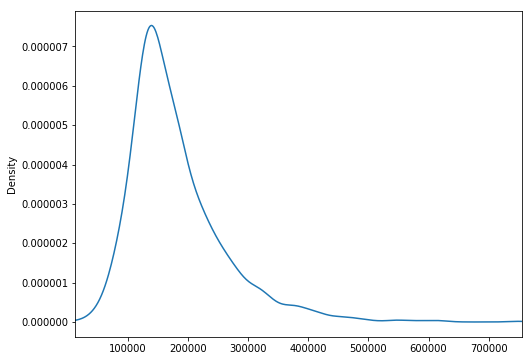

In [5]:
x_min = df['SalePrice'].min()
x_max = df['SalePrice'].max()
df['SalePrice'].plot(kind='density', figsize=(8, 6), xlim=[x_min-1, x_max+1]);

Most houses have a `SalePrice` between 100,000 and 200,000. A long tail of houses have a `SalePrice` greater than 500,000.

In [6]:
print("Minimum SalePrice: {}".format(x_min))
print("Maximum SalePrice: {}".format(x_max))

Minimum SalePrice: 12789
Maximum SalePrice: 755000


## What is the relationship between `SalePrice` and numeric features?

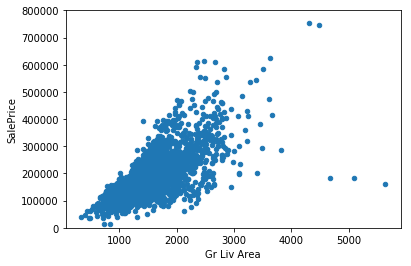

In [7]:
feat = 'Gr Liv Area'  # above grade (ground) living area square feet
df[['SalePrice', feat]].plot.scatter(x=feat, y='SalePrice', ylim=(0, 800000));

We can see that `Gr Liv Area` is linearly associated with `SalePrice`. In general, a larger `Gr Liv Area` is associated with a higher `SalePrice`.

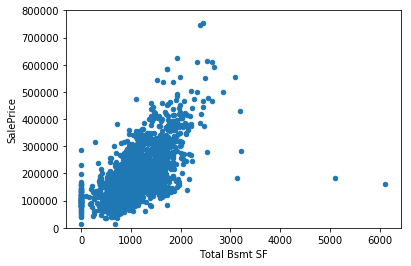

In [8]:
feat = 'Total Bsmt SF'  # total square feet of basement area
df[['SalePrice', feat]].plot.scatter(x=feat, y='SalePrice', ylim=(0, 800000));

We can see that `Total Bsmt SF` is also associated with `SalePrice`, although the relationship becomes more noisy at high sales prices.

## What is the relationship between `SalePrice` and categorical features?

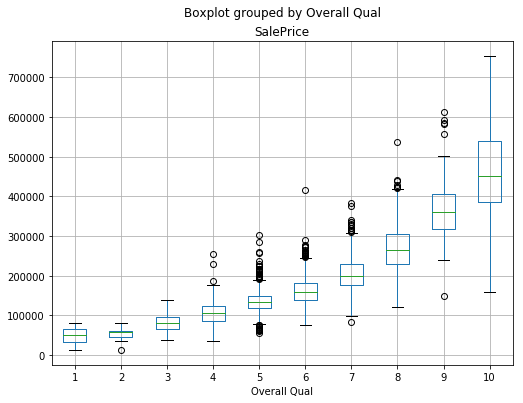

In [9]:
feat = 'Overall Qual'  # 
df[['SalePrice', feat]].boxplot('SalePrice', feat, figsize=(8, 6));

We can see that `SalePrice` generally rises with higher `Overall Qual`.

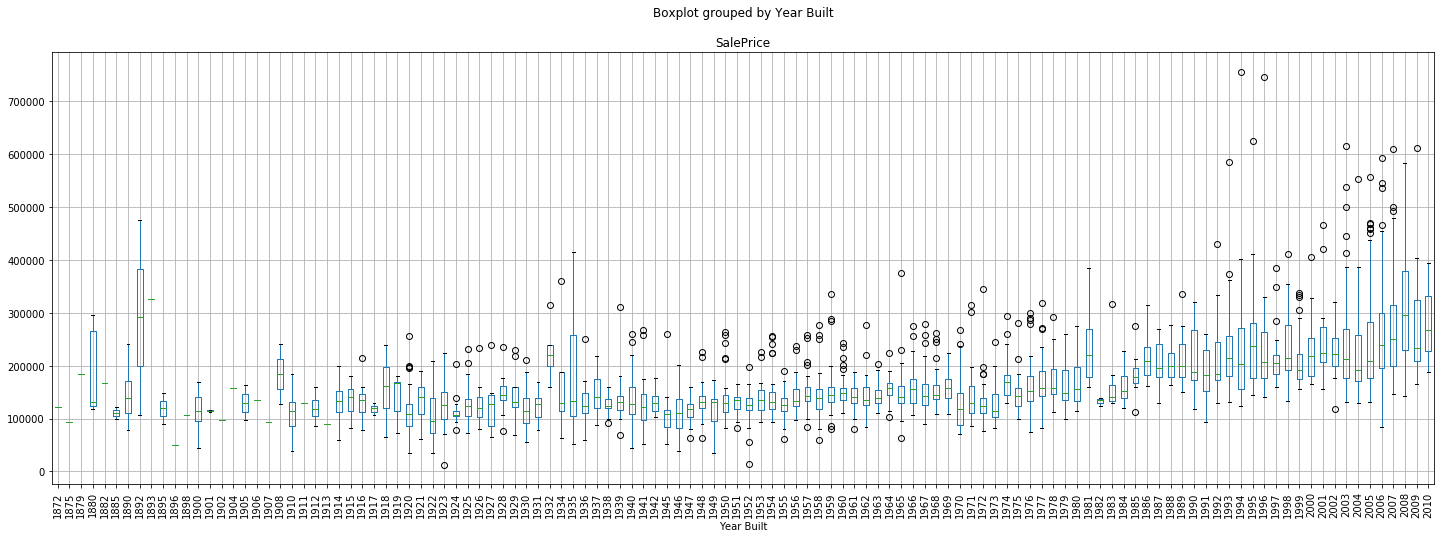

In [10]:
feat = 'Year Built'  # 
df[['SalePrice', feat]].boxplot('SalePrice', feat, rot=90, figsize=(24, 8));

We can see that, in general, `SalePrice` is higher for newer houses.

## What is the relationship between variables with high mutual information.?

While we already know the relationships between some of the variables, a scatter plot gives us a reasonable idea about variables relationships.

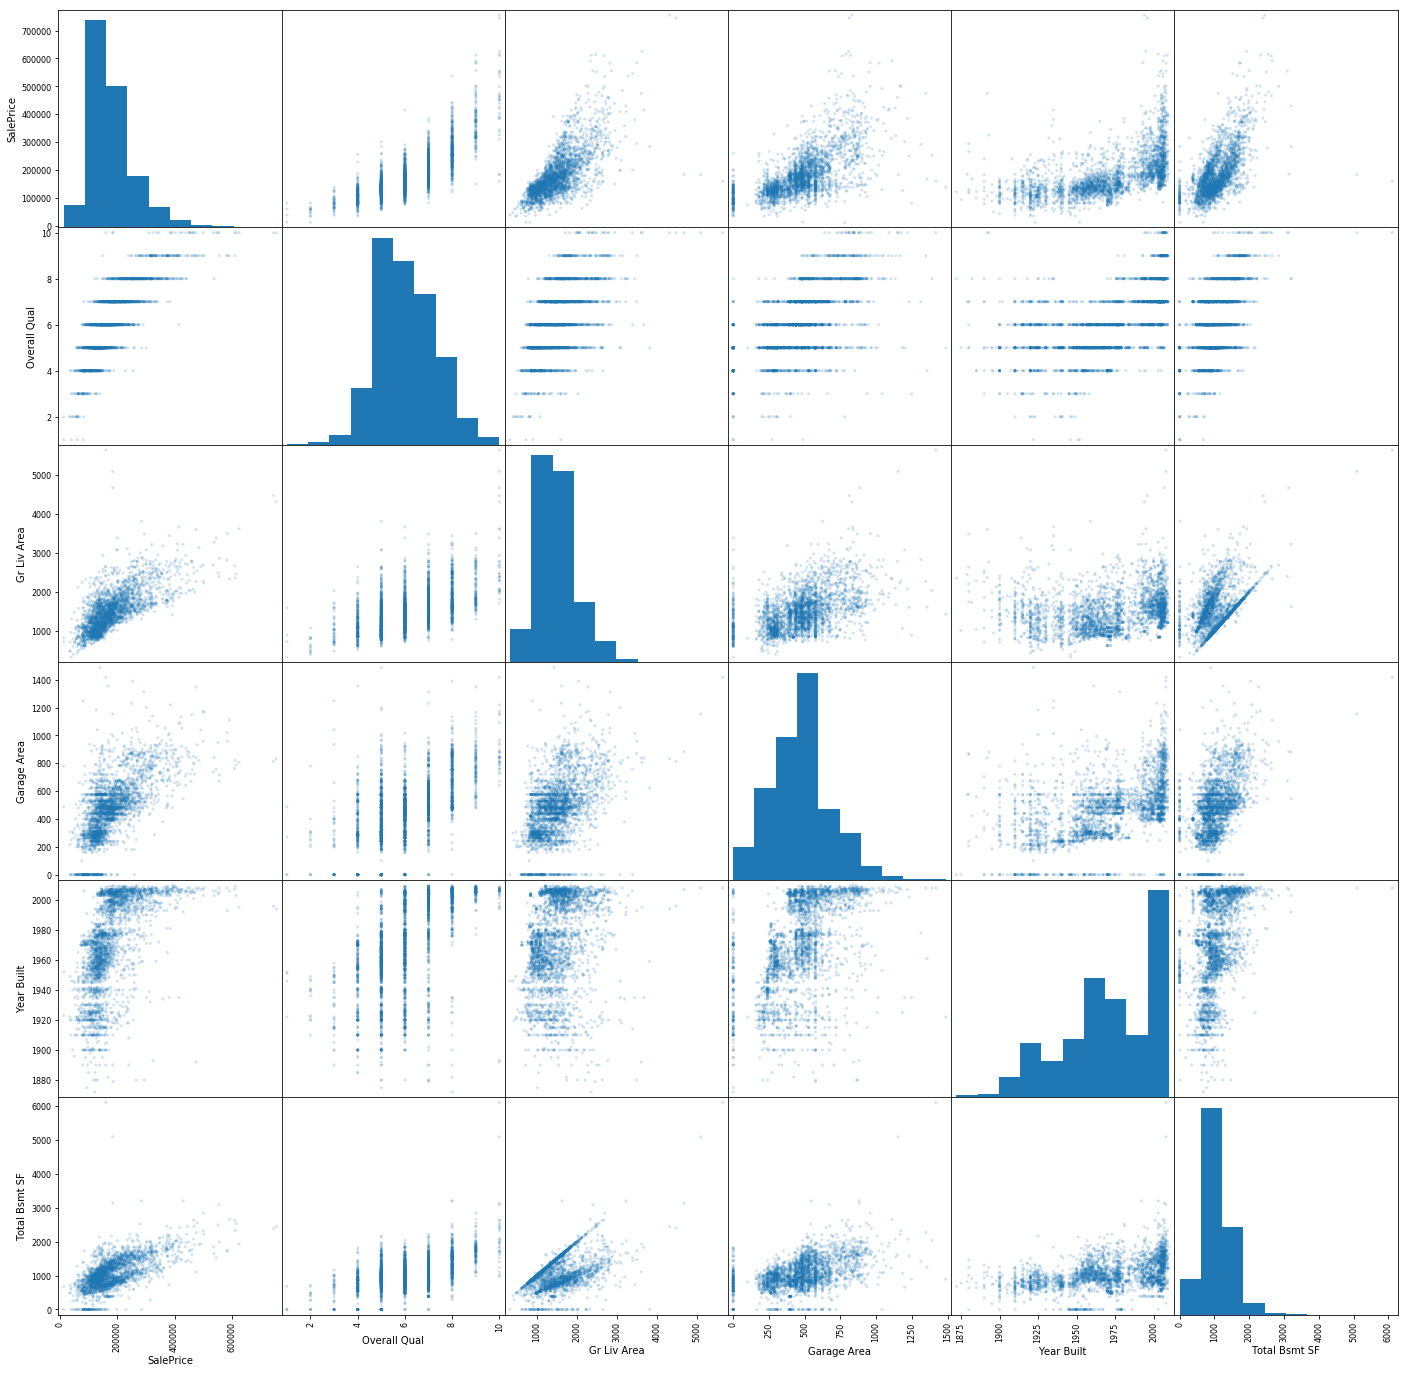

In [11]:
cols = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Year Built', 'Total Bsmt SF']
pd.plotting.scatter_matrix(df[cols], alpha=0.2, figsize=(24, 24), diagonal='hist');

We may find the relationship between `Total Bsmt SF` and `Gr Live Area` interesting. We can see the two features forming a line. It makes sense that the majority of the values stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area larger than the above ground living area.

## Do any features have outliers?

To determine whether any features have outliers, we would like to establish a threshold that defines an observation as an outlier. To do so, we will standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1. We will only standardize continuous values, excluding any ordinal values that are numeric.

In [12]:
X_filled = X.copy()
X_filled_nominal = X_filled.select_dtypes(include=[object])
X_filled_numeric = X_filled.select_dtypes(include=[np.number])

X_filled[X_filled_nominal.columns] = X_filled_nominal.fillna('Missing')
X_filled[X_filled_numeric.columns] = X_filled_numeric.interpolate(method='linear')
X_filled.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,141.0,31770,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal
1,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
2,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
3,20,RL,93.0,11160,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal
4,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal


In [13]:
ord_features = ['Overall Qual', 'Overall Cond']

In [14]:
X_scaled = X_filled.copy()
X_scaled_continuous = X_scaled.select_dtypes(include=[np.number]).drop(ord_features, axis=1)
for col in X_scaled_continuous.columns:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        X_scaled[col] = sklearn.preprocessing.scale(X_scaled[col], axis=0, with_mean=True, with_std=True)
X_scaled.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,-0.877005,RL,3.128744,2.744381,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,-0.375537,-1.163488,Hip,CompShg,BrkFace,Plywood,Stone,0.056729,TA,TA,CBlock,TA,Gd,Gd,BLQ,0.431399,Unf,-0.293918,-0.269181,0.064758,GasA,Fa,Y,SBrkr,1.267003,-0.783185,-0.101005,0.309265,1.082555,-0.249782,-1.024793,-0.755203,0.176094,-0.207291,TA,0.354167,Typ,2.162180,Gd,Attchd,-0.670221,Fin,0.30699,0.257066,TA,TA,P,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,Missing,Missing,Missing,-0.089422,-0.448057,1.678499,WD,Normal
1,-0.877005,RH,0.459721,0.187097,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,-0.342468,-1.115542,Gable,CompShg,VinylSd,VinylSd,None,-0.570422,TA,TA,CBlock,TA,TA,No,Rec,0.055976,LwQ,0.557582,-0.658397,-0.384699,GasA,TA,Y,SBrkr,-0.672643,-0.783185,-0.101005,-1.194427,-0.822482,-0.249782,-1.024793,-0.755203,-1.032234,-0.207291,TA,-0.917535,Typ,-0.925143,Missing,Attchd,-0.631305,Unf,-1.00804,1.196425,TA,TA,Y,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,Missing,MnPrv,Missing,-0.089422,-0.079602,1.678499,WD,Normal
2,-0.877005,RL,0.503475,0.522814,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,-0.441674,-1.259380,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.034330,TA,TA,CBlock,TA,TA,No,ALQ,1.054908,Unf,-0.293918,-0.348845,0.629983,GasA,TA,Y,SBrkr,0.432445,-0.783185,-0.101005,-0.337718,-0.822482,-0.249782,-1.024793,1.234675,0.176094,-0.207291,Gd,-0.281684,Typ,-0.925143,Missing,Attchd,-0.748052,Unf,-1.00804,-0.747397,TA,TA,Y,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,Missing,Missing,Gar2,21.985725,-0.079602,1.678499,WD,Normal
3,-0.877005,RL,1.028529,0.128458,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,-0.110988,-0.779919,Hip,CompShg,BrkFace,BrkFace,None,-0.570422,Gd,TA,CBlock,TA,TA,No,ALQ,1.366663,Unf,-0.293918,1.105596,2.402840,GasA,Ex,Y,SBrkr,2.425687,-0.783185,-0.101005,1.207523,1.082555,-0.249782,0.784028,1.234675,0.176094,-0.207291,Ex,0.990018,Typ,2.162180,TA,Attchd,-0.358895,Fin,0.30699,0.229164,TA,TA,Y,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,Missing,Missing,Missing,-0.089422,-0.816513,1.678499,WD,Normal
4,0.061285,RL,0.197194,0.467348,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,0.848000,0.658466,Gable,CompShg,VinylSd,VinylSd,None,-0.570422,TA,TA,PConc,Gd,TA,No,GLQ,0.765108,Unf,-0.293918,-0.961121,-0.280280,GasA,Gd,Y,SBrkr,-0.590974,0.853432,-0.101005,0.255844,-0.822482,-0.249782,0.784028,1.234675,0.176094,-0.207291,TA,-0.281684,Typ,0.618518,TA,Attchd,0.769662,Fin,0.30699,0.043152,TA,TA,Y,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,Missing,MnPrv,Missing,-0.089422,-1.184969,1.678499,WD,Normal


We can now use these standardized values to establish a threshold. For this data, we will not consider values greater than 7 to be outliers.

Recall the scatter plot for `Total Bsmt SF`.

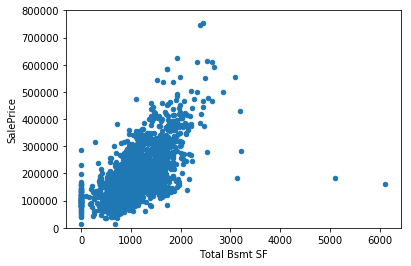

In [15]:
df[['SalePrice', 'Total Bsmt SF']].plot.scatter(x='Total Bsmt SF', y='SalePrice', ylim=(0, 800000));

Let's see whether we would consider any of these to be outliers.

In [16]:
low_range = X_scaled['Total Bsmt SF'][X_scaled['Total Bsmt SF'].argsort()][:10]
high_range = X_scaled['Total Bsmt SF'][X_scaled['Total Bsmt SF'].argsort()][-10:]

print('Outer range (low) of the distribution:')
print(low_range)
print()
print('Outer range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
2176   -2.386823
2088   -2.386823
206    -2.386823
2487   -2.386823
649    -2.386823
2700   -2.386823
1553   -2.386823
676    -2.386823
678    -2.386823
2184   -2.386823
Name: Total Bsmt SF, dtype: float64

Outer range (high) of the distribution:
432      3.583230
1763     3.590040
1637     3.651330
46       4.073547
423      4.636502
2181     4.736382
1772     4.877120
444      4.890740
2180     9.178737
1498    11.482769
Name: Total Bsmt SF, dtype: float64


Two of the values exceed 7.

In [17]:
df_outliers = df.sort_values(by='Total Bsmt SF', ascending=False)[:2]
df_outliers

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


Let's drop the two values.

In [18]:
df = df.drop(df_outliers.index)

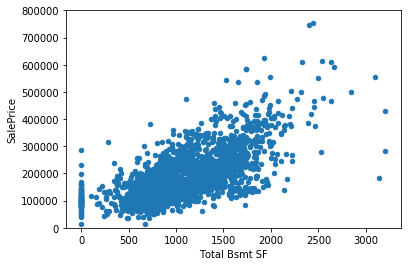

In [19]:
df[['SalePrice', 'Total Bsmt SF']].plot.scatter(x='Total Bsmt SF', y='SalePrice', ylim=(0, 800000));

Recall the scatter plot for `Gr Liv Area`.

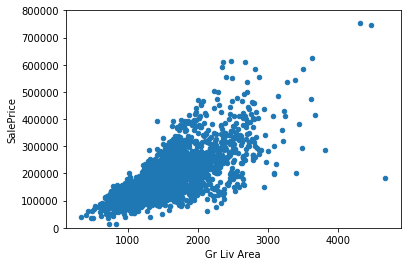

In [20]:
df[['SalePrice', 'Gr Liv Area']].plot.scatter(x='Gr Liv Area', y='SalePrice', ylim=(0, 800000));

Let's see whether we would consider any of these to be outliers.

In [21]:
low_range = X_scaled['Gr Liv Area'][X_scaled['Gr Liv Area'].argsort()][:10]
high_range = X_scaled['Gr Liv Area'][X_scaled['Gr Liv Area'].argsort()][-10:]

print('Outer range (low) of the distribution:')
print(low_range)
print()
print('Outer range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
1901   -2.306368
1302   -2.161934
907    -2.100599
2880   -2.017501
2653   -1.993758
2843   -1.981887
1349   -1.938359
302    -1.898788
943    -1.835475
662    -1.782054
Name: Gr Liv Area, dtype: float64

Outer range (high) of the distribution:
2450    3.957697
2666    4.171380
2445    4.208972
2737    4.298006
1497    4.590830
1767    5.572187
1760    5.888754
2181    6.284463
2180    7.113472
1498    8.195734
Name: Gr Liv Area, dtype: float64


Two of the values exceed 7.

In [22]:
df_outliers = df.sort_values(by='Gr Liv Area', ascending=False)[:2]
df_outliers

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2181,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1760,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1.0,0.0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3.0,813.0,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Let's drop the two values.

In [23]:
df = df.drop(df_outliers.index)

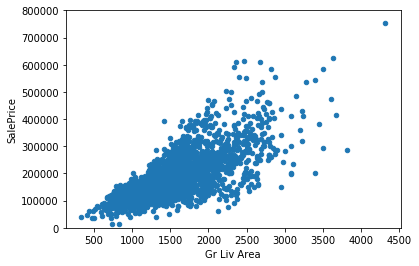

In [24]:
df[['SalePrice', 'Gr Liv Area']].plot.scatter(x='Gr Liv Area', y='SalePrice', ylim=(0, 800000));

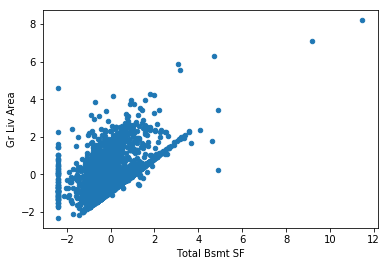

In [25]:
X_scaled[['Total Bsmt SF', 'Gr Liv Area']].plot.scatter(x='Total Bsmt SF', y='Gr Liv Area');